In [1]:
push!(LOAD_PATH, "$(pwd())/../src"); using PyPlot, StatsBase, Distributions, StochasticProcesses;

# Useful Stochastic Processes and Their Properties

## Brownian Motion

$B(t) = \int dB$ $ B(t) \sim N(0, \sqrt{t}) $ 

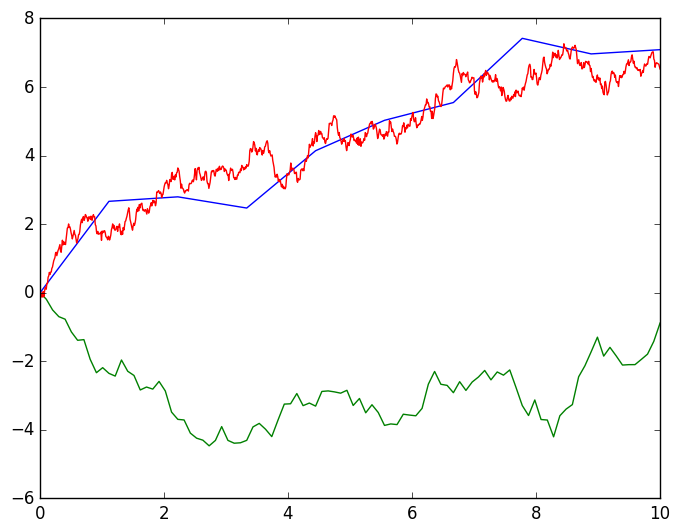

In [2]:
for n in [10, 100, 1000]
    t = linspace(0., 10., n)
    plot(t, cumsim(BrownianMotion(), t))
end

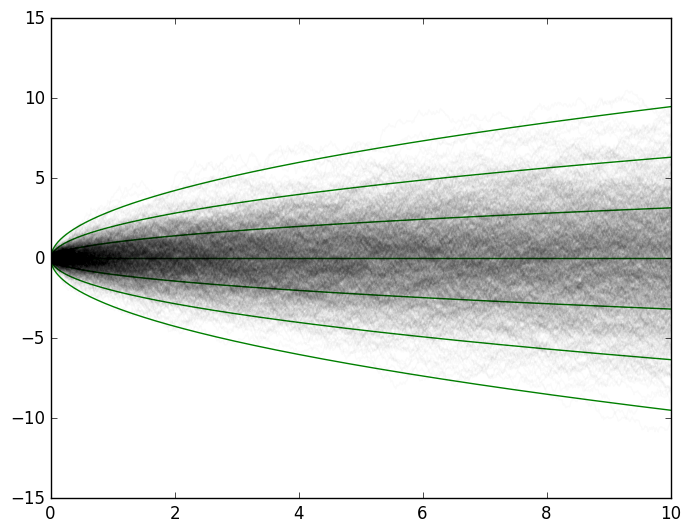

In [3]:
let t=linspace(0., 10., 1000)
    # todo: use distribution
    plot(t, sqrt(t) * transpose(-3:3), color="green")
    plot(t, cumsim(BrownianMotion(), t, 1000), color=(0,0,0,.02))
end;

Distribution approximates the same distribution when we decrease time grid size:

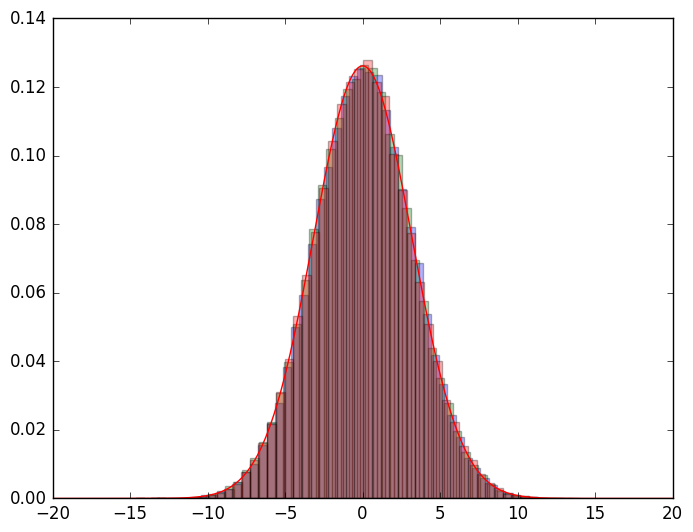

In [4]:
# todo: simplify
for t in linspace.(0., 10., [10, 100, 1000])
    plt[:hist](sim(BrownianMotion(), t, 100000), alpha=0.3, bins=50, normed=true)
end;
(x->plot(x, pdf(distribution(BrownianMotion(), 10.), x), color="red"))(linspace(-20,20,1000));

### Brownian Motion With Drift

$ dS = \mu dt + \sigma dB $

$ S(t) \sim N(S(0)+\mu t, \sigma \sqrt{t}) $

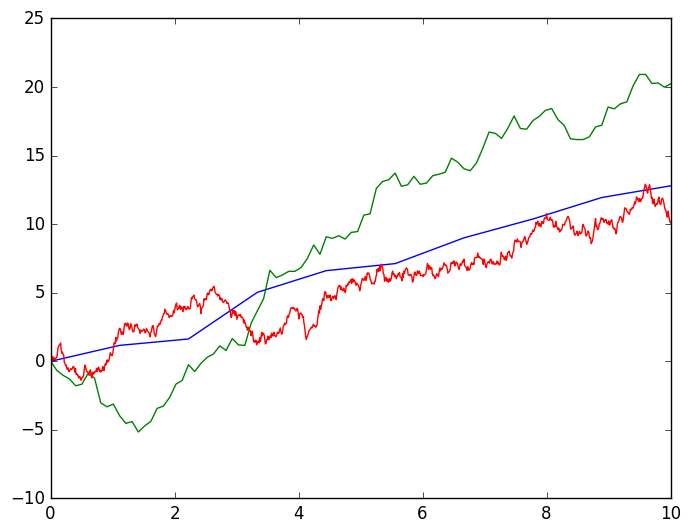

In [5]:
for n in [10, 100, 1000]
    t = linspace(0., 10., n)
    plot(t, cumsim(BrownianMotionWithDrift(1, 2), t))
end

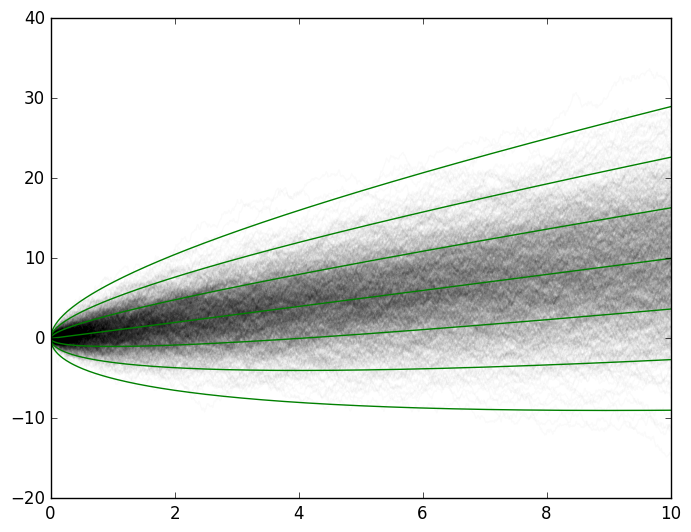

In [6]:
let t=linspace(0., 10., 1000), process=BrownianMotionWithDrift(1, 2)
    plot(t, cumsim(process, t, 1000), color=(0,0,0,.02))

    # TODO: create helper function
    fn = (t, q) -> quantile(distribution(process, t+1e-20), q)
    for k in -3:3 
        plot(t, fn.(t, cdf(Normal(), k)), label=k, color="green")
    end

end;

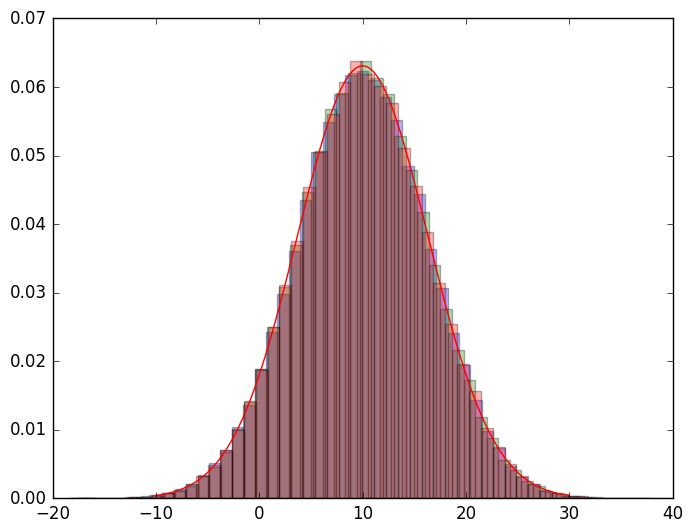

In [7]:
let process=BrownianMotionWithDrift(1, 2), t1=10.
    for t in linspace.(0., t1, [10, 100, 1000])
        plt[:hist](sim(process, t, 100000), alpha=0.3, bins=50, normed=true)
    end;
    (x->plot(x, pdf(distribution(process, t1), x), color="red"))(linspace(-10,30,1000));
end;

## Geometric Brownian Motion (Simple Price Model)

$ dS = \mu S dt + \sigma S dB $

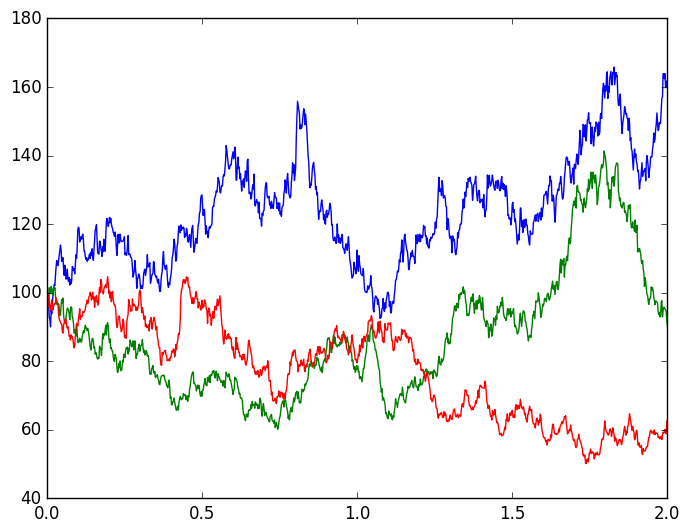

In [8]:
let t=linspace(0., 2., 1000), process=GeometricBrownianMotion(.3, .4, 100.)
    plot(t, cumsim(process, t, 3))
end;

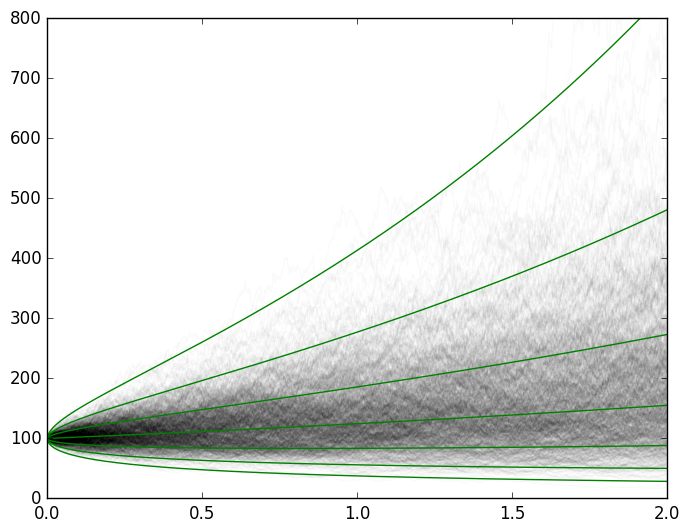

In [9]:
let t=linspace(0., 2., 1000), process=GeometricBrownianMotion(.3, .4, 100.)
    plot(t, cumsim(process, t, 1000), color=(0,0,0,.02))
    ylim(0, 800)

    # TODO: create helper function
    fn = (t, q) -> quantile(distribution(process, t+1e-20), q)
    for k in -3:3 
        plot(t, fn.(t, cdf(Normal(), k)), label=k, color="green")
    end

end;

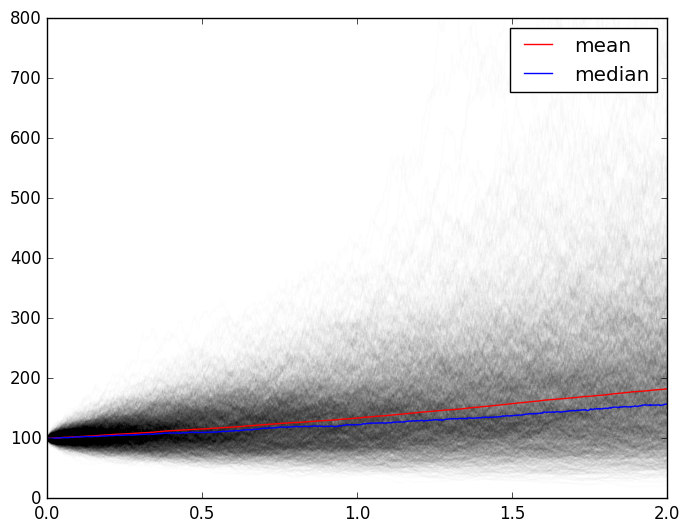

In [10]:
# todo: simplify
let process=GeometricBrownianMotion(.3, .4, 100.), t=linspace(0, 2, 1000), data = cumsim(process, t, 2000)
    plot(t, data, color=(0, 0, 0, 0.01))
    ylim(0, 800)
    
    n = length(t)
    m1 = zeros(n)
    m2 = zeros(n)
    for i in 1:n
        m1[i] = mean(data[i, :])
        m2[i] = median(data[i, :])
    end
    
    plot(t, m1, label="mean", color="red")
    plot(t, m2, label="median", color="blue")
    legend()
end;

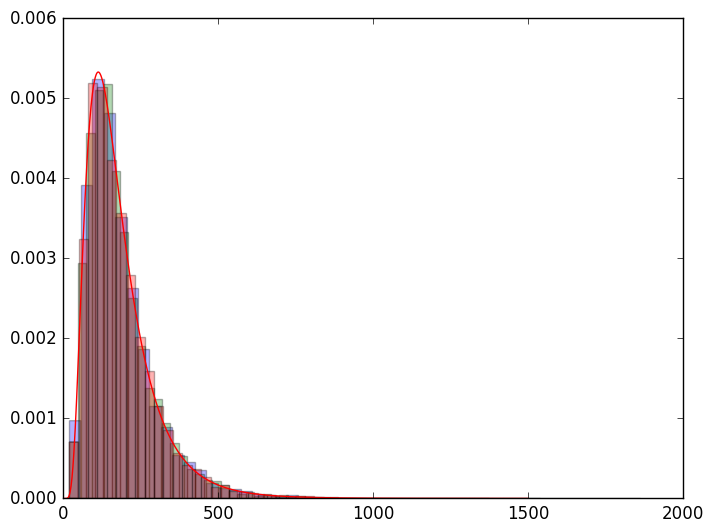

In [11]:
let process=GeometricBrownianMotion(.3, .4, 100.), t1=2.
    for t in linspace.(0., t1, [10000, 20000, 40000])
        plt[:hist](sim(process, t, 10000), alpha=0.3, bins=50, normed=true)
    end;
    (x->plot(x, pdf(distribution(process, t1), x), color="red"))(linspace(1,1500,1000));
end;

### Integrated Brownian Motion

$ Z(t) = \int_0^t B(s) dt $

$ Z(t) \sim N(0, \sqrt{t^3/3}) $

In [12]:
mutable struct IntegratedBrownianMotion <: AItoProcess
end

Base.convert(::Type{ItoProcess}, m::IntegratedBrownianMotion) = ItoProcess((t,dt,b,db,y)->b .* dt, 0.);

StochasticProcesses.distribution(m::IntegratedBrownianMotion, t) = Normal(0, sqrt(t^3/3));

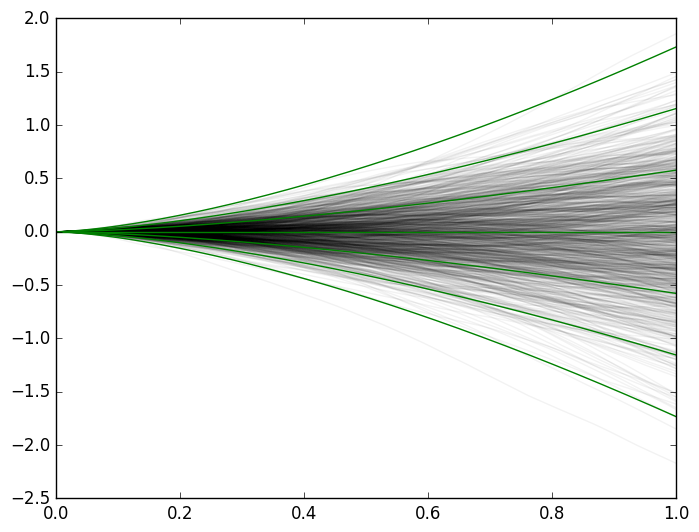

In [13]:
let t=linspace(0., 1., 1000)
    plot(t, cumsim(IntegratedBrownianMotion(), t, 1000), color=(0, 0, 0, .05))
    
    # TODO: create helper function
    fn = (t, q) -> quantile(distribution(IntegratedBrownianMotion(), t+1e-20), q)
    for k in -3:3 
        plot(t, fn.(t, cdf(Normal(), k)), label=k, color="green")
    end

end;

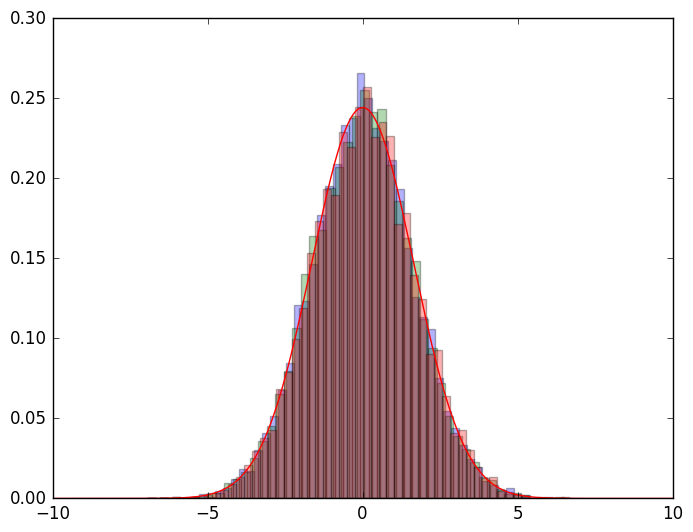

In [14]:
for n in [10000, 20000, 40000]
    t=linspace(0., 2., n)
    plt[:hist](sim(IntegratedBrownianMotion(), t, 10000), alpha=0.3, bins=50, normed=true)
end
(t -> plot(t, pdf(distribution(IntegratedBrownianMotion(), 2.), t), color="red"))(linspace(-10,10,1000));